<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***Objectives***

After this discussion, you should be able to:

*   Know the difference between a null and alternative hypothesis
*   Write your own set of hypotheses for testing



In [ ]:
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline
%config InlineBackend.figure_formats = ['svg']

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
from scipy.stats import binom
import math

$ \ $

----

## ***Null Hypothesis***

I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

$$\color{yellow}{\text{How can we test it?}}$$

$\underline{Experiment:}$ We do an experiment in which I call 100 coin flips. I get 57 right.


$ \ $

----

## ***Determining the Null and Alternative Hypothesis***

$ \ $


$\underline{Null:}$ My true rate (tasa) of flip prediction is 0.5.

$ \ $

$\underline{Alternative:}$ My true rate of flip prediction is greater than 0.5.

$ \ $

The thing we're measuring from the experiment, or **test statistic**, is the number of correct flip predictions out of 100.




$ \ $

---

## ***Analysis***



If the null hypothesis is correct, the test statistic is binomial distributed with parameters

 $ \ $


$$\color{yellow}{\begin{cases}n = 100,\\  \\ p = 0.5\end{cases}}$$

 $ \ $

$$\color{aquamarine}{P(X=k) = {n \choose k} p^{n-k}(1-p)^{k}={100 \choose k}\dfrac{1}{2^{100}}.}$$

$ \ $
 
That is, if we repeated the whole experiment many times, we would see such a distribution for all the results. So if the null hypothesis is correct, then:

$ \ $

$$\text{How likely is it that I got 57 or more coin flips correct?}$$


$ \ $

The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely (demasiado improbable) and we will conclude that we don't think the null hypothesis is true.



In [ ]:
#help(binom.cdf)

In [ ]:
# f(k,n,p) = P(X=k) =nCk*p^(n-k)p^(k)
# P(X>= 57)=1-P(X<57)=1-P(X<=56)
# k = 57
# n = 100
# p = 0.5
prob = 1-binom.cdf(56, 100, 0.5)

# mostramos en pantalla el resultado de la probabilidad
print("The probability is", str(round(prob*100, 1))+"%")

The probability is 9.7%


The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null hypotesis.


$ \ $

----

## ***Exercise***

Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant (clarividente).

In [ ]:
# binom.ppf(q,n,p) = Percent point function (inverse of cdf)
# F(k, n, p) =  F(k) = q = P(X<=k)  ===>  F^{-1}(q,n,p) = binom.ppf(k,n,p)^{-1}

binom.ppf(0.95, 100, 0.5)

58.0

In [ ]:
binom.cdf(58, 100, 0.5)

0.9556869599429662

Which means, one should get 58 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.




$ \ $ 

----

## ***A More Specific Claim***

Now, it is natural to change a little the previous null hypothesis. For example, we have now this null hypothesis:

$ \ $

* $\underline{\text{Null hypothesis:}}$ "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable (valioso)."

$ \ $

* $\underline{\text{Alternative hypothesis:}}$ "I can't predict coin tosses 60% of the time."

$ \ $

### ***Questions***


$(1)$ What do we do in this case?

Sure, we can do exactly what we did earlier when I predict 57 times, we can reject my claim.

$ \ $

$(2)$ What happend if I say, 

$ \ $

$$\text{"Wait a minute. I said 60 and I got 57, that sounds pretty good to me."}$$

$ \ $

equivalently

$ \ $

$$\text{"I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"}$$

$ \ $

What do we say to that? The issue here is that there is no  longer (ya no hay) a single null hypothesis that we prove or disprove. Instead, we have two competing hypotheses:

$ \ $

* $\underline{\text{Hypothesis A:}}$ There is no predictive power.

$ \ $

* $\underline{\text{Hypothesis B:}}$ There is a 60% predictive power.

$ \ $

Each is a normal curve, with one centered at 50% and the other at 60%.

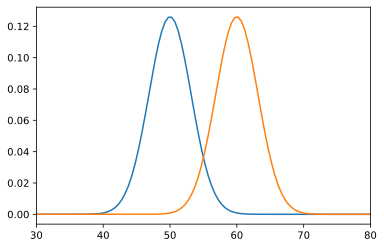

In [ ]:
mu_1 = 50
mu_2 = 60
variance = 10
sigma = math.sqrt(variance)


x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu_1, sigma))
plt.plot(x,stats.norm.pdf(x, mu_2, sigma))

plt.xlim(30,80)
plt.show()

And 57 correct guesses falls within the 95% confidence interval  of both the curves.


In [ ]:
# P(X>=57) = P(X>56)= 1-P(X<=56)
# p = 0.6
# n = 100
# k = 56
print(1 - binom.cdf(56, 100, 0.6))

0.7634688198308841


In [ ]:
# P(X>=57) = P(X>56)= 1-P(X<=56)
# p = 0.6
# n = 100
# k = 56
print(1 - binom.cdf(56, 100, 0.5))

0.09667395224782127


$ \ $

-----

# ***What now?***

There just isn't enough data to achieve a confidence of 95%. There are few things we can do.


### $(1)$ ***Decrease confidence.***

Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say:

$$\text{"If I can predict over 55, then I have predictive power"}$$

This would mean that we have decreased our confidence level.

In [ ]:
# P(X>56)= 1-P(X<=55)
# p = 0.5
# n = 100
# k = 55 
print(1 - binom.cdf(55, 100, 0.5))

0.13562651203691767


In [ ]:
# P(X>56)= 1-P(X<=55)
# p = 0.6
# n = 100
# k = 55
print(1 - binom.cdf(55, 100, 0.6))

0.8210983672768939


$ \ $

### $(2)$ ***Be biased (ser parcial).***

But it is not neccessary that we bias (sesguemos) the two hypotheses equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

$ \ $

$(a)$ For example, if we stuck with the original 95% on a coin being fair:


In [ ]:
# binom.ppf(q,n,p) = Percent point function (inverse of cdf)
# F(k, n, p) =  F(k) = q = P(X<=k)  ===>  F^{-1}(q,n,p) = binom.ppf(k,n,p)^{-1}
# q = 0.95 = P(X<= k)
# n = 100
# p = 0.5
# binom.ppf(0.95, 100, 0.5) = k
binom.ppf(0.95, 100, 0.5) 

58.0

In [ ]:
# binom.ppf(q,n,p) = Percent point function (inverse of cdf)
# F(k, n, p) =  F(k) = q = P(X<=k)  ===>  F^{-1}(q,n,p) = binom.ppf(k,n,p)^{-1}
# q = 0.95 = P(X<= k)
# n = 100
# p = 0.6
# binom.ppf(0.95, 100, 0.5) = k
binom.ppf(0.95, 100, 0.6) 

68.0

$ \ $

$(b)$ Then our cutff is 58 (in the case $p=0.5$).


In [ ]:
# P(X>58)= P(X>=57) = 1-P(X<=58)
# p = 0.5
# n = 100
# k = 58
print(1-binom.cdf(58, 100, 0.5))

0.04431304005703385


$ \ $

### $(3)$ ***Increase sample size***

The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.


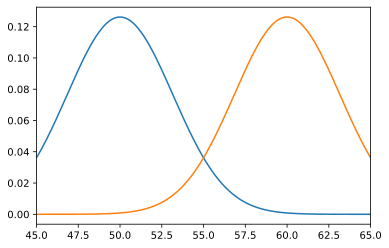

In [ ]:
mu_1 = 50
mu_2 = 60
variance = 10
sigma = math.sqrt(variance)


x = np.linspace(1, 100, 1000)


plt.plot(x,stats.norm.pdf(x, mu_1, sigma))
plt.plot(x,stats.norm.pdf(x, mu_2, sigma))


plt.xlim(45,65)
plt.show()

The two normal curves are completely seperated now.


In [ ]:
# binom.ppf(q,n,p) = Percent point function (inverse of cdf)
# F(k, n, p) =  F(k) = q = P(X<=k)  ===>  F^{-1}(q,n,p) = binom.ppf(k,n,p)^{-1}
# q = 0.95 = P(X<= k)
# n = 1000
# p = 0.5, 0.6
# binom.ppf(0.95, 100, 0.5) = k

print("Number of attempts to have an effectiveness of 95% with p = 0.5 is", binom.ppf(0.95, 1000, 0.5))
print("\n")
print("Number of attempts to have an effectiveness of 95%  with p = 0.6 is", binom.ppf(0.05, 1000, 0.6))

Number of attempts to have an effectiveness of 95% with p = 0.5 is 526.0


Number of attempts to have an effectiveness of 95%  with p = 0.6 is 574.0


$ \ $

----

## ***Exercise***

What are our error now?




In [ ]:
# P(X>550)= P(X>=551) = 1-P(X<=550)
# p = 0.5
# n = 1000
# k = 550

print(binom.cdf(549, 1000, 0.5))

0.9991347319575119


In [ ]:
# P(X>550)= P(X>=551) = 1-P(X<=550)
# p = 0.6
# n = 1000
# k = 550

print(binom.cdf(549, 1000, 0.6))

0.0005936030829813317
